In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc

%matplotlib inline

### Load training data

In [2]:
item = pd.read_csv('all/item_category.csv')

In [3]:
item.head()

,item_id,item_name_translated,item_cat1,item_cat2
0,5441,PC: Headset HyperX Cloud Core gaming stereo (K...,PC,Headsets / Headphones
1,16255,Headphones PHILIPS SBC HC8680,PC,Headsets / Headphones
2,16256,Headphones RITMIX RH-120,PC,Headsets / Headphones
3,16257,Headphones RITMIX RH-124 Black,PC,Headsets / Headphones
4,5606,PS2: Memory Card 8 MB Black (Memory Card 8Mb -...,Accessories,PS2


In [4]:
shop = pd.read_csv('all/shops-translated.csv')

In [5]:
shop.head()

,shop_id,City,Type,Name
0,0,Yakutsk,Shop,"Ordzhonikidze, 56 francs"
1,1,Yakutsk,TC,Central franc
2,2,Adygea,TC,Mega
3,3,Balashikha,TRC,October-Kinomir
4,4,Volzhsky,TC,Volga Mall


In [6]:
train = pd.read_csv('all/sales_train.csv.gz')

In [7]:
train = pd.merge(train, shop)
train = pd.merge(train, item)

In [8]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,City,Type,Name,item_name_translated,item_cat1,item_cat2
0,02.01.2013,0,59,22154,999.0,1.0,Yaroslavl,SC,Altair,SCENE 2012 (BD),Cinema,Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray


In [9]:
train.City.value_counts()

Moscow             1049370
Yakutsk             204404
SanktPetersburg     148535
Voronezh            144151
Khimki              143480
Tyumen              125455
Ufa                  96423
Krasnoyarsk          76177
Samara               75421
Chekhov              69573
Web                  69463
SergievPosad         66321
NizhnyNovgorod       64197
Kursk                63911
Rostov-on-Don        59664
Kaluga               59511
Surgut               56695
Kazan                54803
Omsk                 46013
Yaroslavl            42108
Novosibirsk          39944
Volzhsky             38242
Vologda              38179
Adygea               25991
Balashikha           25532
Zhukovsky            21896
Tomsk                21612
Mytischi              5027
OutboundTrade         3751
Name: City, dtype: int64

In [10]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,City,Type,Name,item_name_translated,item_cat1,item_cat2
0,02.01.2013,0,59,22154,999.0,1.0,Yaroslavl,SC,Altair,SCENE 2012 (BD),Cinema,Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray


In [11]:
train.Type.value_counts()

TC       1738640
TRC       458041
Shop      277278
SC        223155
SEC       163729
Web        69463
Other       5543
Name: Type, dtype: int64

In [12]:
train.Name.value_counts()

Mega                          297089
Семеновский                   235636
Atrium                        186104
MEGA Teply Stan II"           142234
Ordzhonikidze, 56             117428
Central                       114943
Nevsky Center                 109253
MEGA Belaya Dacha II          105366
(Plekhanovskaya, 13)           82663
Carnival                       69573
7YA                            66321
Goodwin                        65173
Pushkinsky                     63911
XXI Century                    59511
Fantastic                      58445
Afi Mall                       58133
Maksimir                       58076
City Mall                      56695
Areal (Belyaevo)               53910
June                           53227
Budenovskiy (pav.K7)           53032
Family 2                       52921
Colosseum Rio"                 52734
Perlovski                      50860
New Century (Novokosino)"      49225
С21                            45434
Green Beach                    44433
A

In [13]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,City,Type,Name,item_name_translated,item_cat1,item_cat2
0,02.01.2013,0,59,22154,999.0,1.0,Yaroslavl,SC,Altair,SCENE 2012 (BD),Cinema,Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray


In [14]:
train.item_cat1.value_counts()

Cinema                                  833416
Games                                   523559
PC Games                                506036
Music                                   401862
Gifts                                   370450
Accessories                              76238
Books                                    69421
Programs                                 65234
Payment cards                            33011
Game Consoles                            24770
Office                                    9067
Elements of a food                        7206
Payment cards (Movies, Music, Games)      4875
Clean media (piece)                       4390
Delivery of goods                         2193
Tickets (figure)                          1877
Official                                  1325
Clean carriers (spire)                     795
Android games                               91
Payment Cards                               19
MAC Games                                    8
Книги        

In [15]:
train.item_cat2.value_counts()

DVD                         564652
Standard Edition            351591
CD of local production      339585
PS3                         232789
Blu-Ray                     192674
XBOX 360                    170647
Additional Edition          121539
PS4                         111743
Soft toys                    53845
Board games (compact)        53227
Figures                      47177
Blu-Ray 3D                   42718
Home and Office              42603
Development                  41706
Board Games                  37635
Souvenirs (per sample)       35484
PSP                          34823
PSVita                       34056
Collector's                  32748
MP3                          32490
Bags, Albums, Mouse pads     31397
Souvenirs                    26822
Audiobooks                   26537
Gadgets, robots, sports      25949
Methodical materials 1С      23708
PSN                          23166
XBOX ONE                     21597
Digit                        20748
Accessories for game

In [16]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,City,Type,Name,item_name_translated,item_cat1,item_cat2
0,02.01.2013,0,59,22154,999.0,1.0,Yaroslavl,SC,Altair,SCENE 2012 (BD),Cinema,Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray


### Some shops are not in the test set

In [17]:
x = train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum()

In [18]:
shop_max_month = {}
for s in x.index.levels[0]:
    shop_max_month[s] = x[s].index.max()

In [19]:
shop_max_month = pd.Series(shop_max_month)

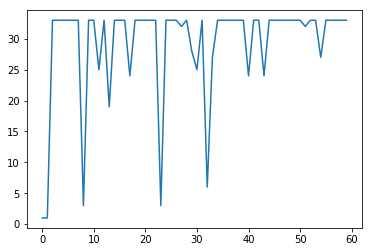

In [20]:
plt.plot(shop_max_month)

In [21]:
test = pd.read_csv('all/test.csv.gz')

In [22]:
test.shop_id.unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45], dtype=int64)

Text(0.5,1,'Some shops are not in the test set')

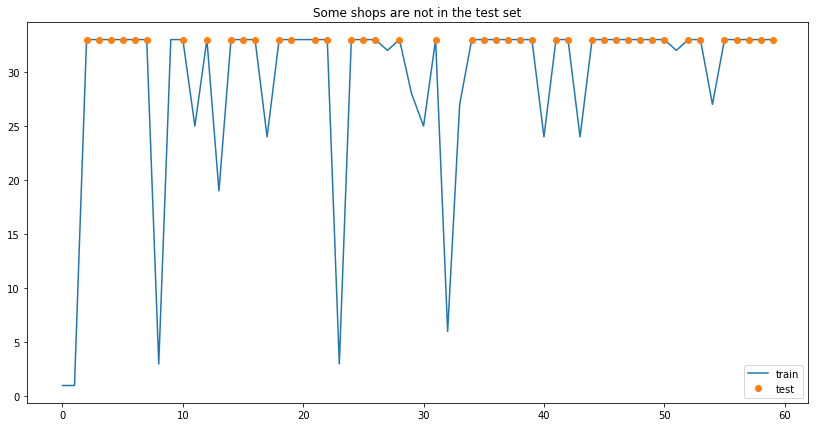

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(shop_max_month.index, shop_max_month, label='train')
plt.plot(test.shop_id.unique(), 33*np.ones((42, )), 'o', label='test')
plt.legend()
plt.title('Some shops are not in the test set')

Remove those shops

In [24]:
test_shop_id = test.shop_id.unique()

# train = train[train.shop_id.isin(test_shop_id)]

### Items not in train or not in test?

In [25]:
items_train_test = set(train.item_id)&set(test.item_id)# items in both train and test

In [26]:
len(items_train_test)

4737

In [27]:
items_train_only = set(train.item_id)-set(test.item_id) # items only in train

In [28]:
len(items_train_only)

17070

In [29]:
items_test_only = set(test.item_id)-set(train.item_id) # items only in test

In [30]:
len(items_test_only)

363

In [31]:
test.item_id.unique().shape

(5100,)

In [32]:
test.shop_id.unique().shape

(42,)

In [33]:
42*5100

214200

In [34]:
test.shape

(214200, 3)

In [35]:
363*42

15246

### sales of each item across all shops

In [36]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,City,Type,Name,item_name_translated,item_cat1,item_cat2
0,02.01.2013,0,59,22154,999.0,1.0,Yaroslavl,SC,Altair,SCENE 2012 (BD),Cinema,Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Moscow,TRC,Atrium,SCENE 2012 (BD),Cinema,Blu-Ray


In [45]:
item_cat2_per_month = train.groupby(['item_cat2', 'date_block_num'])['item_cnt_day'].sum()

In [47]:
item_cat2_per_month.head()

item_cat2         date_block_num
1C: Enterprise 8  0                 677.0
                  1                 744.0
                  2                 764.0
                  3                 712.0
                  4                 460.0
Name: item_cnt_day, dtype: float64

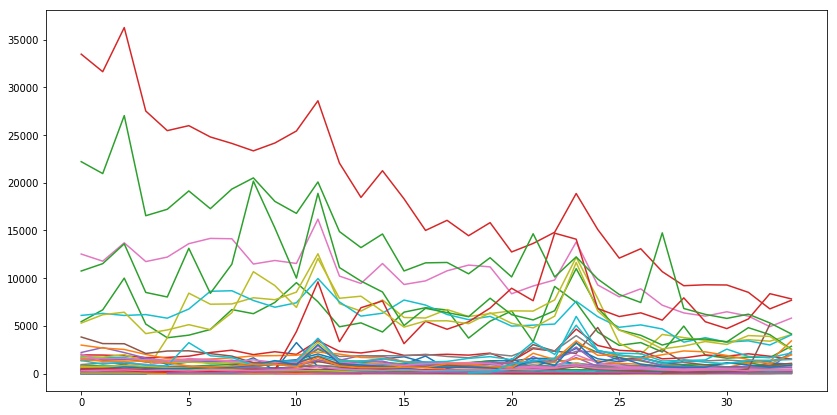

In [50]:
plt.figure(figsize=(14, 7))
for i in item_cat2_per_month.index.levels[0]:
    plt.plot(item_cat2_per_month[i].index, item_cat2_per_month[i])

In [51]:
item_cat1_per_month = train.groupby(['item_cat1', 'date_block_num'])['item_cnt_day'].sum()

In [52]:
item_cat1_per_month.shape

(538,)

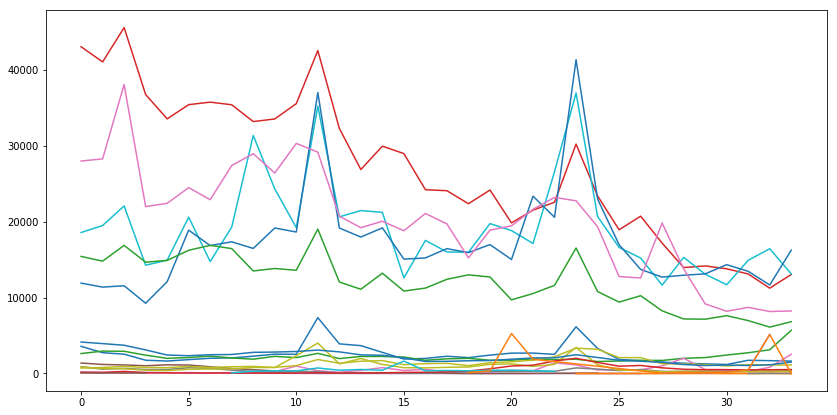

In [54]:
plt.figure(figsize=(14, 7))
for i in item_cat1_per_month.index.levels[0]:
    plt.plot(item_cat1_per_month[i].index, item_cat1_per_month[i])

### Sales per shop

In [55]:
shop_per_month = train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum()

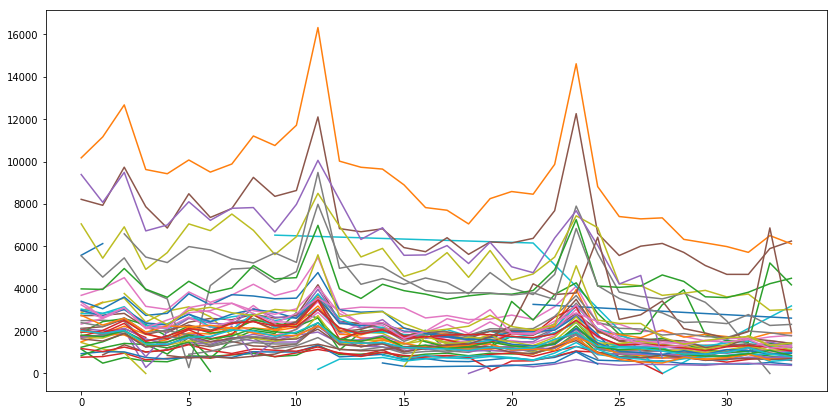

In [56]:
plt.figure(figsize=(14, 7))
for i in shop_per_month.index.levels[0]:
    plt.plot(shop_per_month[i].index, shop_per_month[i])

### Sales per month

In [61]:
sales_per_month = train.groupby(['date_block_num'])['item_cnt_day'].sum()

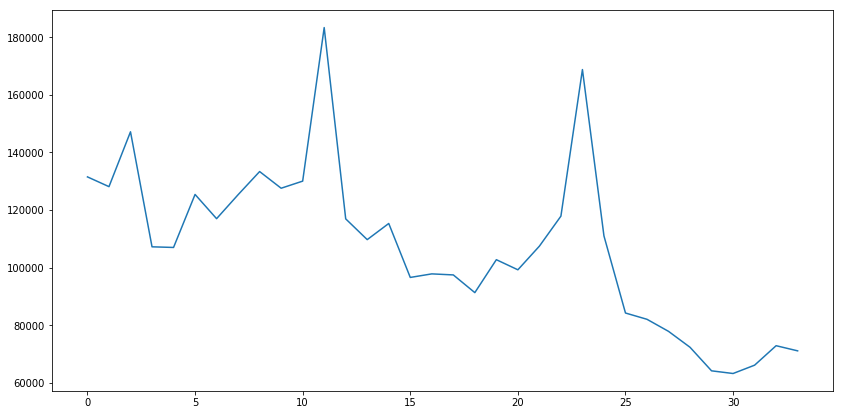

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(sales_per_month)

### Number of shops per month

In [64]:
shops_per_month = train.groupby(['date_block_num'])['shop_id'].nunique()

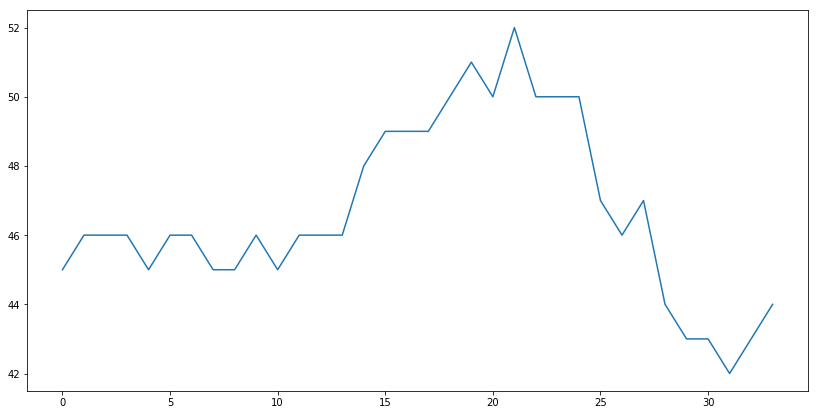

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(shops_per_month)

### Number of items per month

In [67]:
items_per_month = train.groupby(['date_block_num'])['item_id'].nunique()

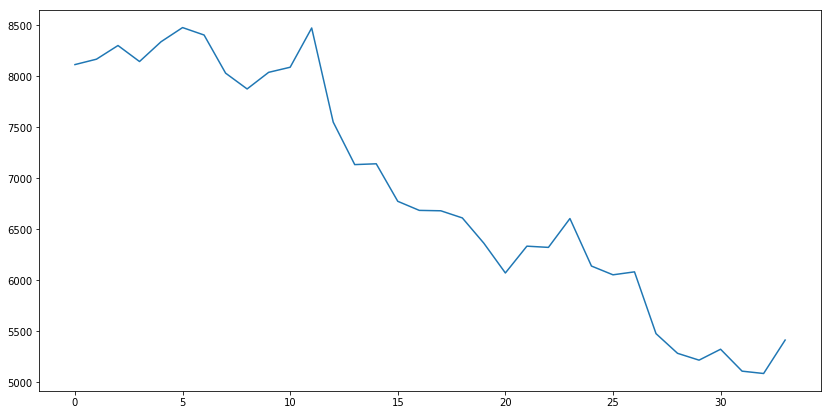

In [68]:
plt.figure(figsize=(14, 7))
plt.plot(items_per_month)

### Total sales (rubles) per month

In [70]:
train['ruble'] = train['item_price']*train['item_cnt_day']

In [74]:
ruble_per_month = train.groupby(['date_block_num'])['ruble'].sum()

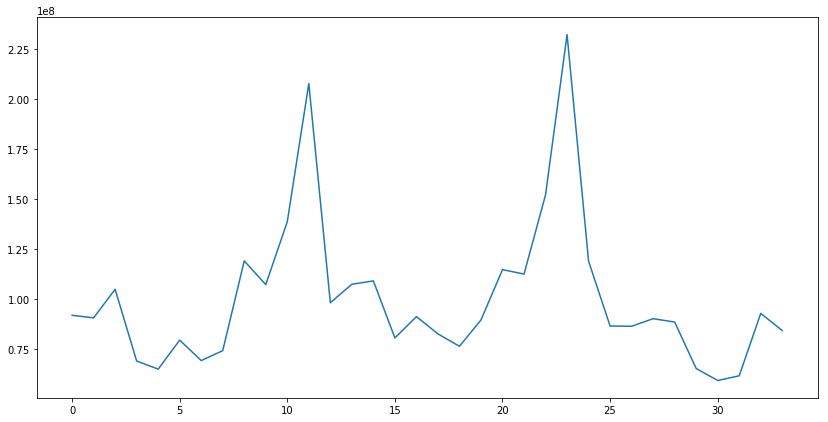

In [76]:
plt.figure(figsize=(14, 7))
plt.plot(ruble_per_month)

### Item price per month

In [78]:
item_cat1_price = train.groupby(['date_block_num', 'item_cat1'])['item_price'].mean()

In [84]:
item_cat1_price = item_cat1_price.swaplevel(0, 1)

C:\Users\lyaa\AppData\Local\Continuum\miniconda3\envs\kaggle\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


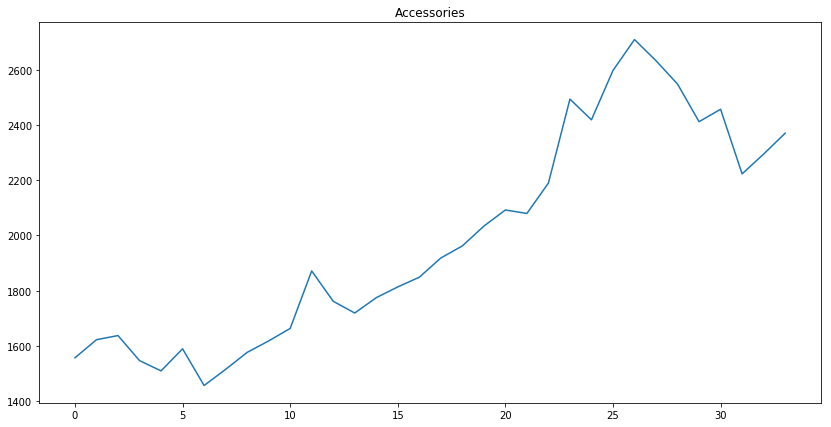

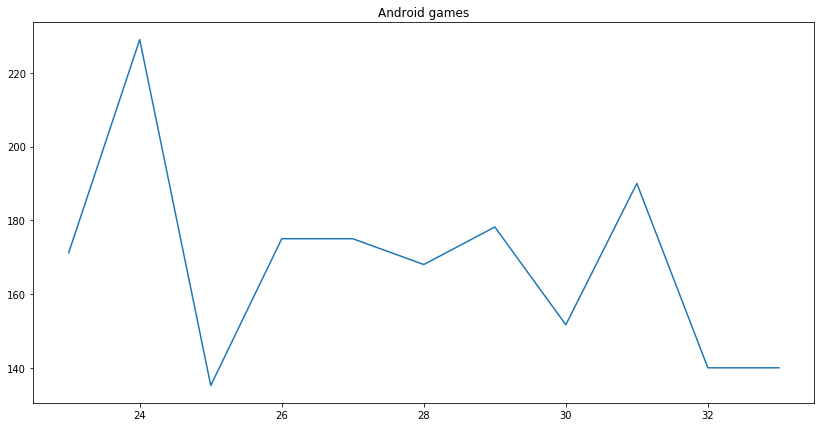

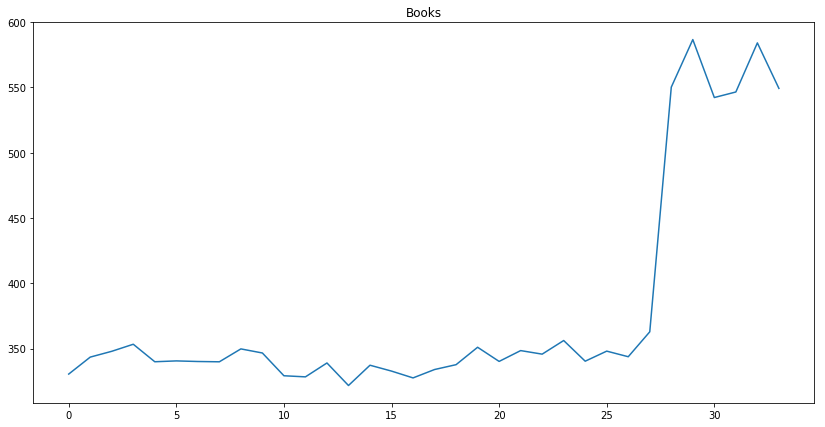

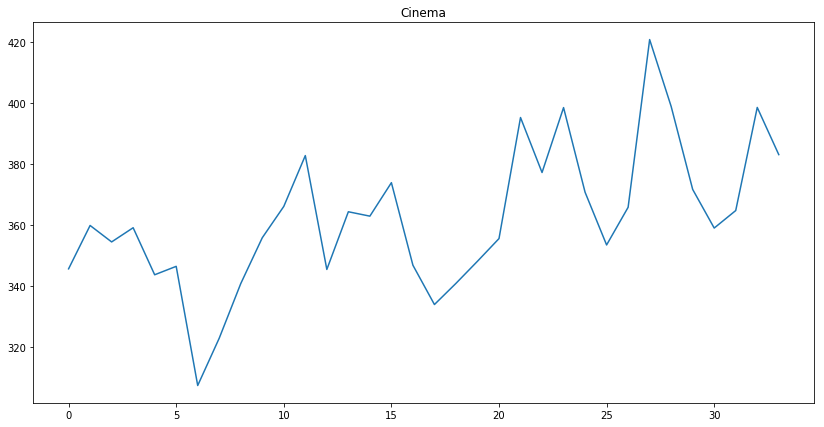

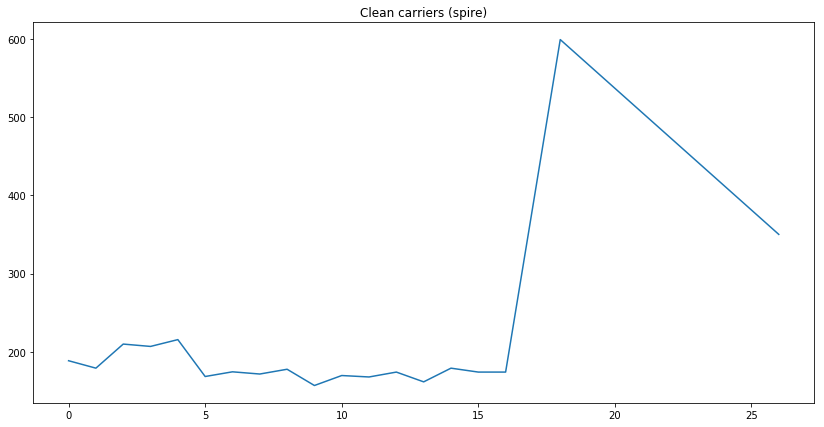

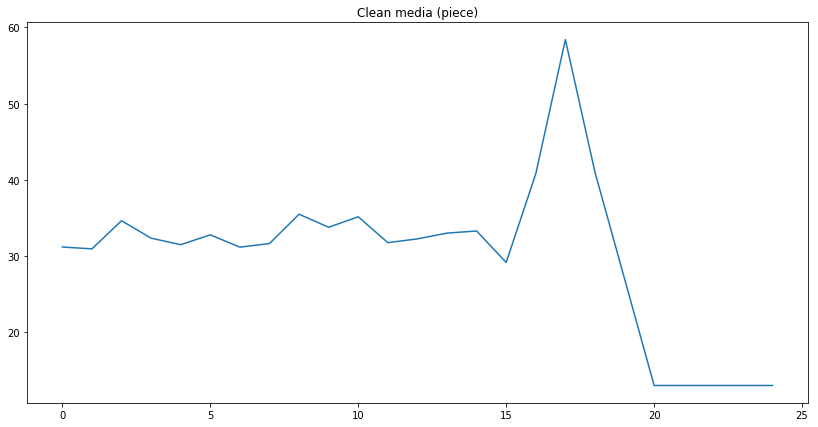

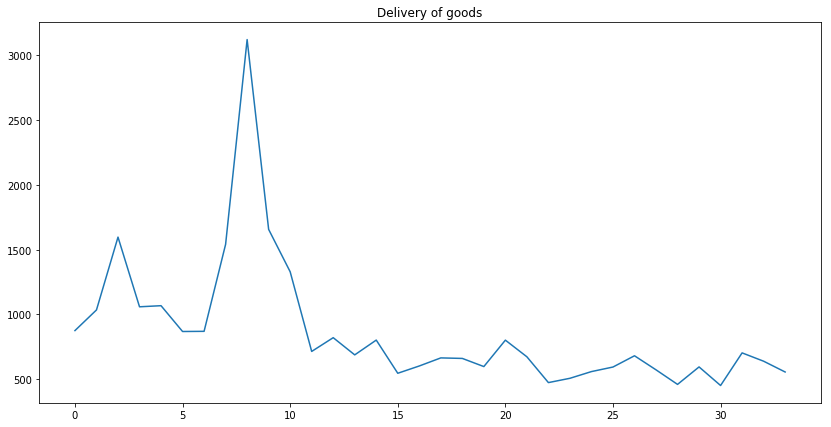

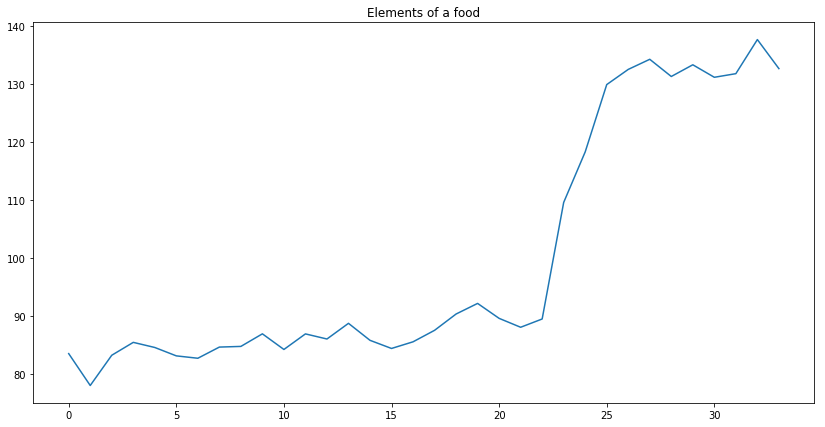

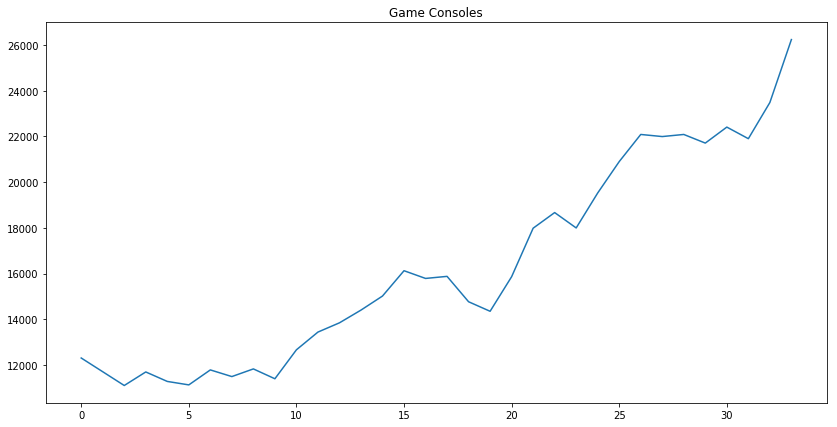

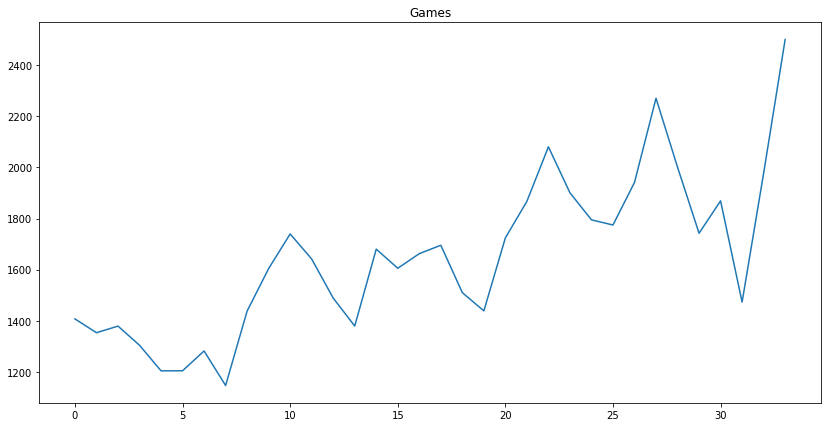

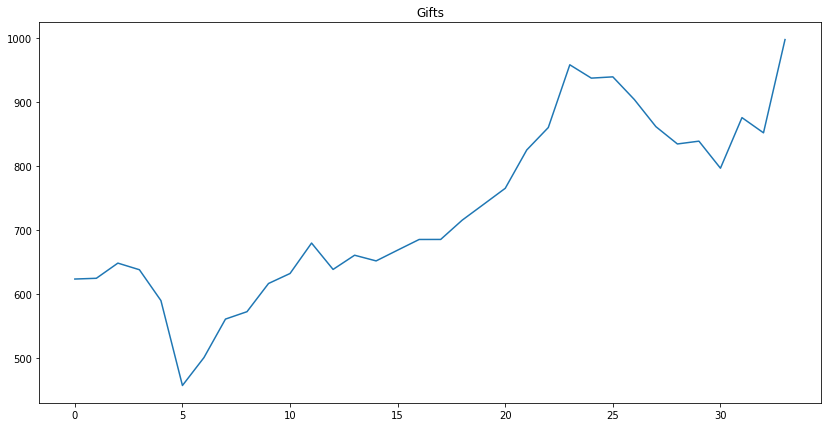

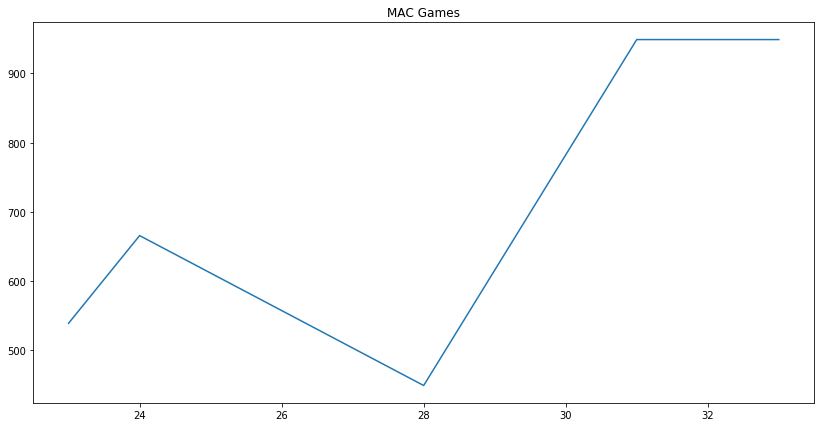

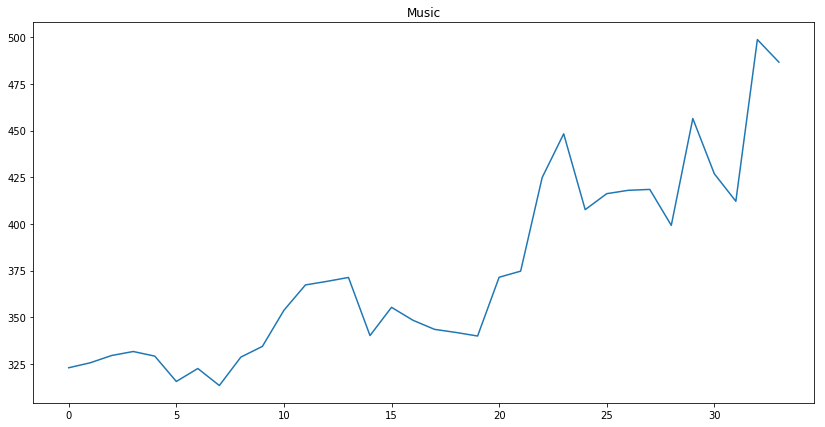

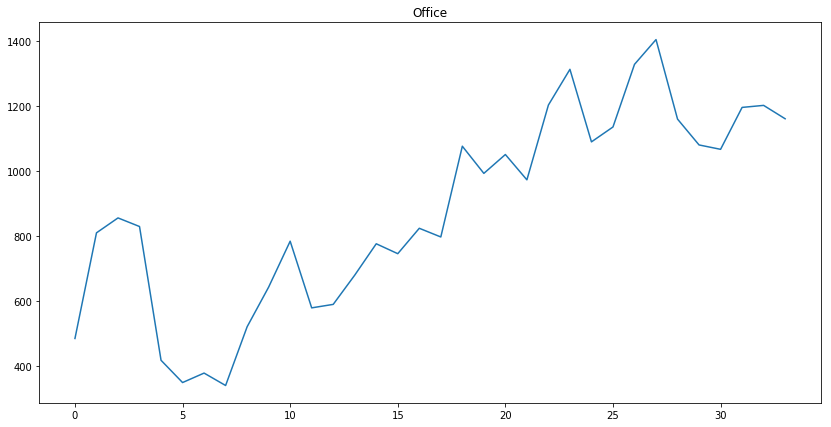

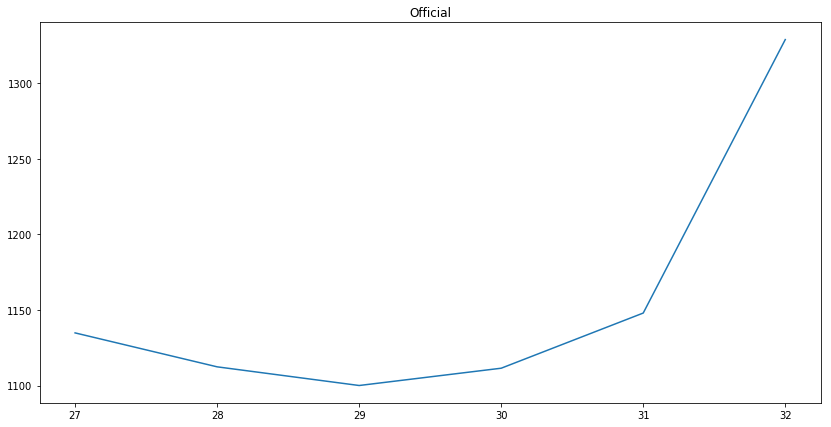

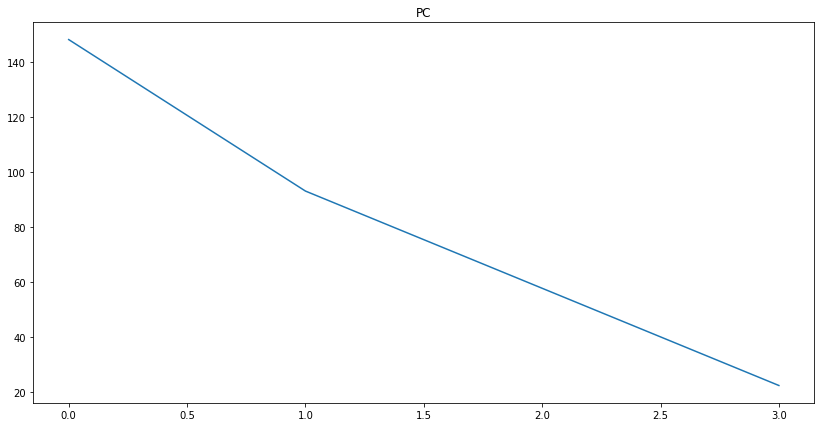

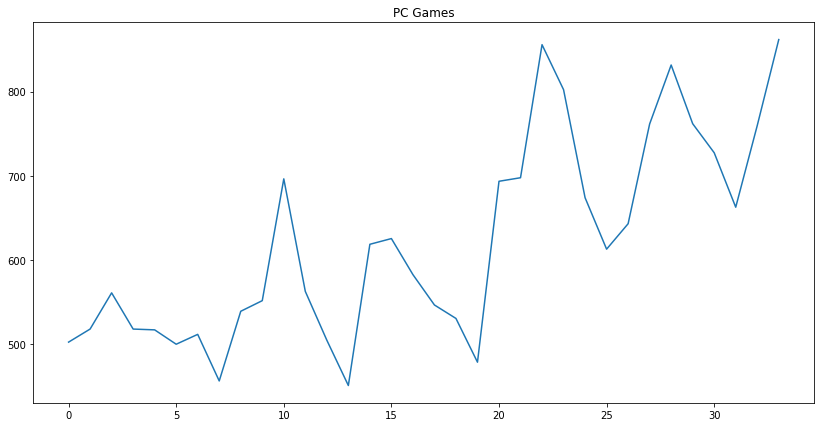

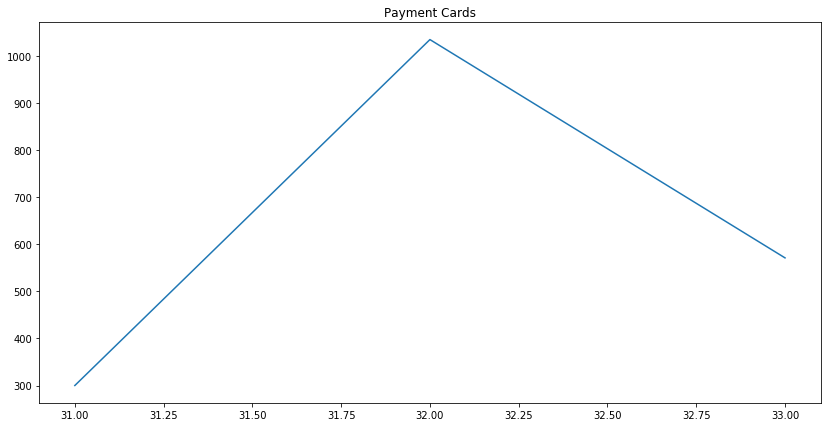

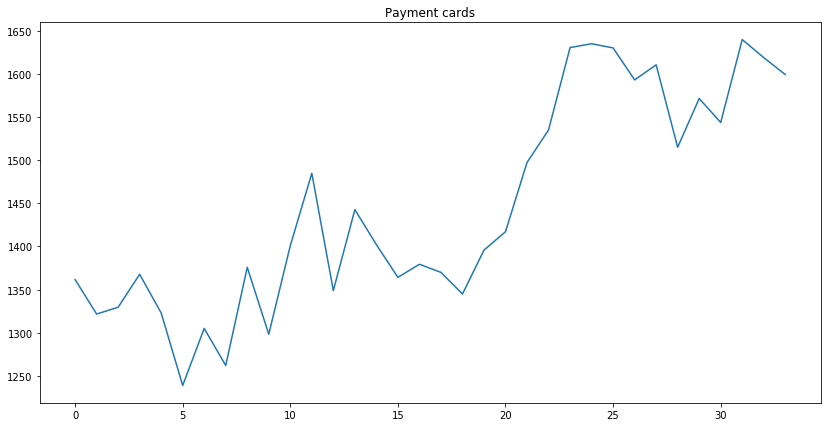

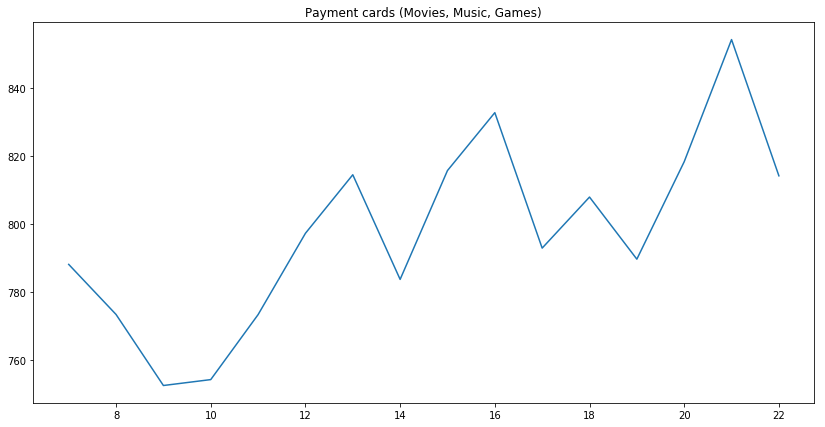

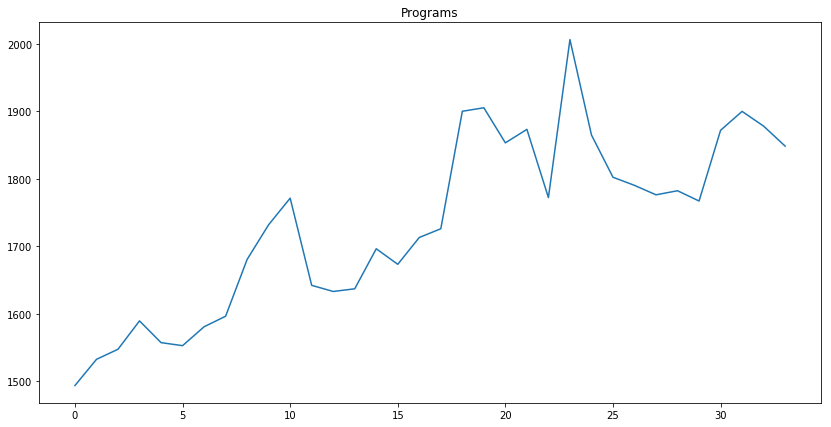

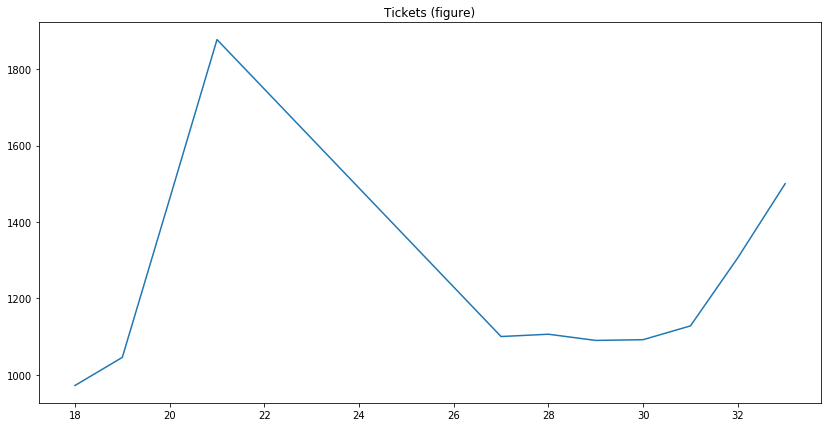

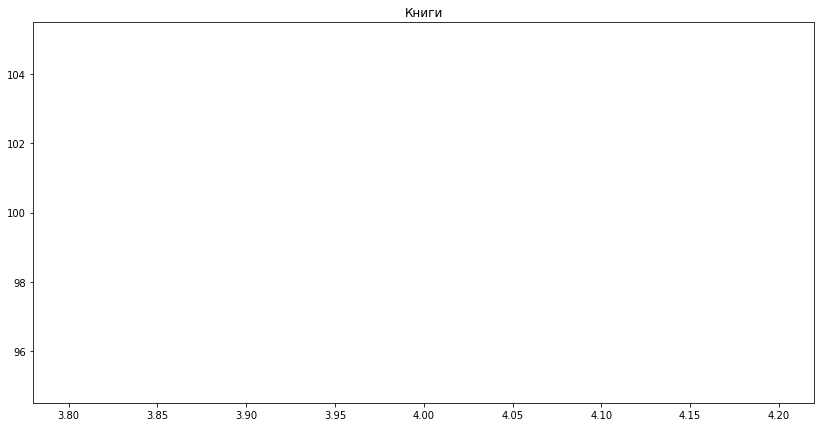

In [99]:
for i in item_cat1_price.index.levels[0]:
    plt.figure(figsize=(14, 7))
    plt.plot(item_cat1_price[i].index, item_cat1_price[i], label=i)
    plt.title(i)
#plt.legend(bbox_to_anchor=(1.01, 1))

In [88]:
item_cat1_price['Accessories']

date_block_num
0     1556.786779
1     1622.352149
2     1637.304411
3     1546.652715
4     1509.467409
5     1589.379758
6     1456.537964
7     1514.960843
8     1576.373706
9     1617.843812
10    1663.104013
11    1871.188159
12    1761.504187
13    1718.898770
14    1774.446775
15    1813.409139
16    1848.451482
17    1917.988427
18    1961.816180
19    2033.462495
20    2091.883613
21    2079.286754
22    2189.349044
23    2493.252572
24    2418.322852
25    2596.907906
26    2708.770537
27    2632.118693
28    2547.785787
29    2411.512661
30    2456.573810
31    2222.625780
32    2294.222203
33    2369.791981
Name: item_price, dtype: float64